In [198]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm


from datetime import datetime, timezone
from dateutil import tz
import pytz

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

sns.set(rc={'figure.figsize':(16, 10)});

In [307]:
ca_data = pd.read_csv("15minute_data_california.csv")

In [138]:
ca_data.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [139]:
ca_data["dishwasher1"].describe()

count    805524.000000
mean          0.008491
std           0.074620
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.097000
Name: dishwasher1, dtype: float64

In [308]:
ca_data["date"] = pd.to_datetime(ca_data["local_15min"].str[:-3], format='%Y-%m-%d %H:%M:%S')
ca_data["day_of_week"] = [d.weekday() for d in ca_data["date"]]
ca_data["hour"] = [d.hour for d in ca_data["date"]]
ca_data["year"] = [d.year for d in ca_data["date"]]
ca_data["month"] = [d.month for d in ca_data["date"]]
ca_data

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,grid,heater1,heater2,heater3,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,sewerpump1,shed1,solar,solar2,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,date,day_of_week,hour,year,month
0,3687,2014-01-01 00:00:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.008,NaN,NaN,NaN,1.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225,NaN,0.055,NaN,NaN,NaN,0.597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769,2014-01-01 00:00:00,2,0,2014,1
1,3687,2014-01-01 00:15:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.008,NaN,NaN,NaN,1.905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224,NaN,0.235,NaN,NaN,NaN,0.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628,2014-01-01 00:15:00,2,0,2014,1
2,3687,2014-01-01 00:30:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.008,NaN,NaN,NaN,1.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224,NaN,0.005,NaN,NaN,NaN,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859,2014-01-01 00:30:00,2,0,2014,1
3,3687,2014-01-01 00:45:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.008,NaN,NaN,NaN,1.535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224,NaN,0.005,NaN,NaN,NaN,0.277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985,2014-01-01 00:45:00,2,0,2014,1
4,3687,2014-01-01 01:00:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.008,NaN,NaN,NaN,1.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223,NaN,0.005,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368,2014-01-01 01:00:00,2,1,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805519,6547,2015-09-30 22:45:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.008,NaN,NaN,NaN,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,NaN,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.619,120.179,2015-09-30 22:45:00,2,22,2015,9
805520,6547,2015-09-30 23:00:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.007,NaN,NaN,NaN,0.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,NaN,NaN,NaN,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.167,119.729,2015-09-30 23:00:00,2,23,2015,9
805521,6547,2015-09-30 23:15:00-05,0.000,NaN,NaN,NaN,NaN,NaN,NaN,

In [195]:
np.unique(ca_data["dataid"])

array([ 203, 1450, 1524, 1731, 2606, 3687, 3864, 3938, 4495, 4934, 5938,
       6377, 6547, 7062, 7114, 8061, 8342, 8574, 8733, 9213, 9612, 9775,
       9836])

In [183]:
metadata = pd.read_csv("metadata.csv")
metadata = metadata.iloc[1: , :]
metadata["dataid"] = metadata["dataid"].astype(dtype='int32')
metadata = metadata[metadata["dataid"].isin(np.unique(ca_data["dataid"]))]
pd.set_option('display.max_columns', None)
metadata

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,egauge_1s_data_availability,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,grid,heater1,heater2,heater3,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,sewerpump1,shed1,solar,solar2,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1,wellpump1,water_ert_min_time,water_ert_max_time,water_data_availability,gas_ert_min_time,gas_ert_max_time,gas_data_availability,indoor_temp_min_time,indoor_temp_max_time,indoor_temp_data_availability,date_enrolled,date_withdrawn,house_construction_year,total_square_footage,first_floor_square_footage,second_floor_square_footage,third_floor_square_footage,half_floor_square_footage,lower_level_square_footage,pv,pv_panel_direction,total_amount_of_pv,amount_of_south_facing_pv,amount_of_west_facing_pv,amount_of_east_facing_pv,number_of_nests,audit_2011,audit_2013_2014,survey_2011,survey_2012,survey_2013,survey_2014,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
696,1731,yes,Town Home,San Diego,California,2013-12-11 18:00:00-06:00,2020-11-01 02:59:00-06:00,100%,2019-03-15 19:00:00-05:00,2020-11-01 02:00:00-06:00,100%,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-15,NaN,NaN,1555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Civita - Text Message,NaN
704,8342,yes,Town Home,San Diego,California,2013-10-22 19:00:00-05:00,2020-11-01 02:59:00-06:00,100%,2019-03-15 19:00:00-05:00,2020-11-01 02:00:00-06:00,100%,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-15,NaN,2012.0,1401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Civita - Text Message,NaN
986,5938,NaN,Town Home,San Diego,California,2013-09-27 19:00:00-05:00,2017-10-27 04:33:00-05:00,100%,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-19,2018-10-17,2013.0,1464.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Civita - Text Message,NaN
989,3938,NaN,Apartment,San Diego,California,2013-09-27 19:00:00-05:00,2017-01-15 08:59:00-06:00,100%,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,Na

Columns with useful data: "dataid", "local_15min", "air1", "clotheswasher1", "clotheswasher_dryg1", "dishwasher1", "disposal1", "dryg1", "grid", "kitchenapp1", "kitchenapp2", "livingroom1", "microwave1", "oven1", "refrigerator1", "date", "day_of_week", "hour", "month", "year"

The rest is just NaNs

## Useage Statistics for the Entire Dataset

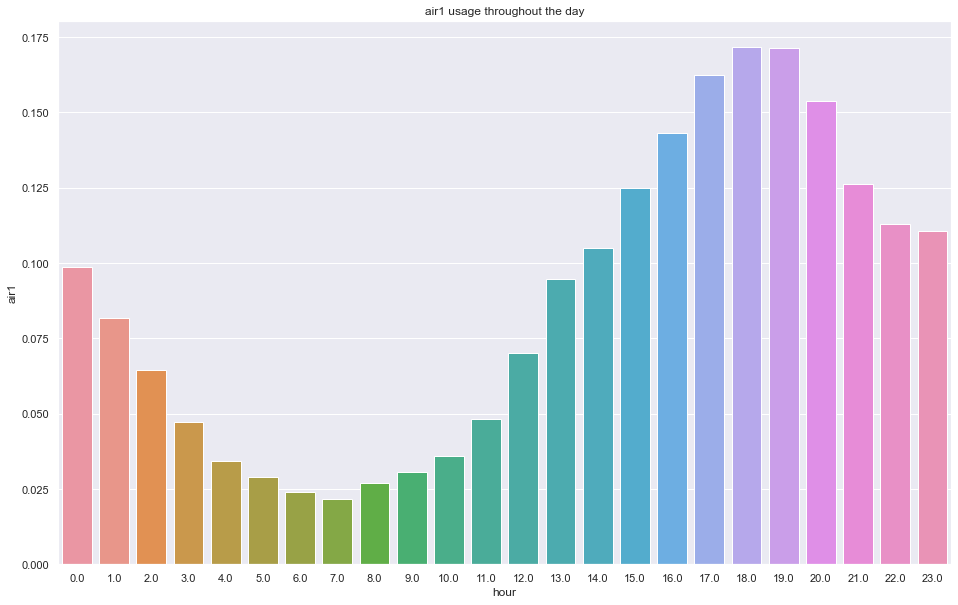

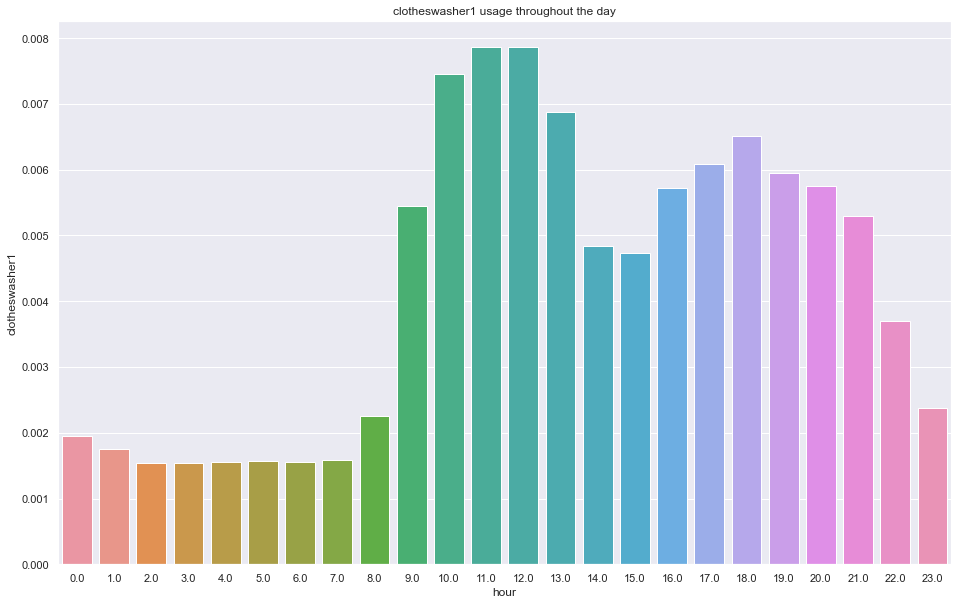

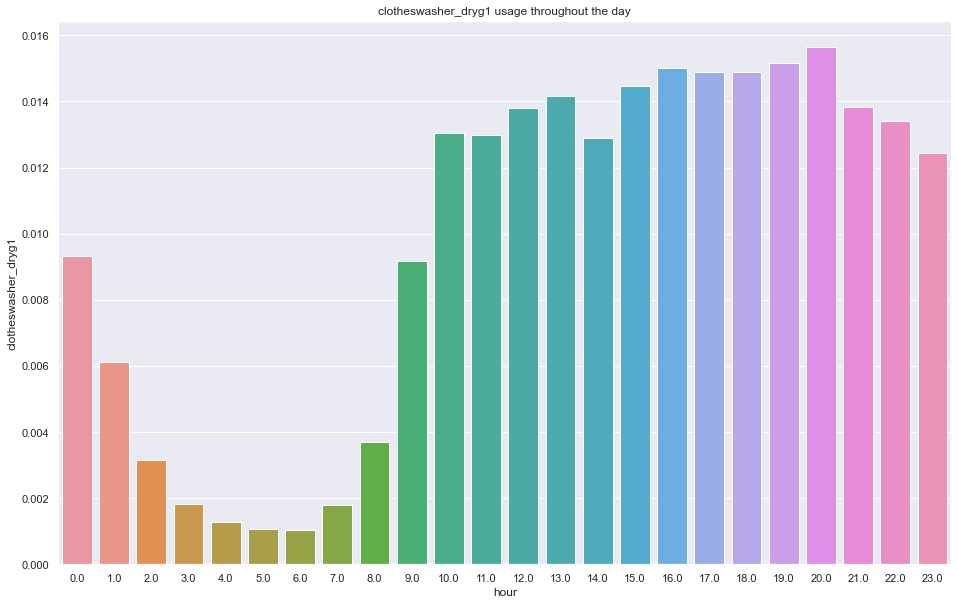

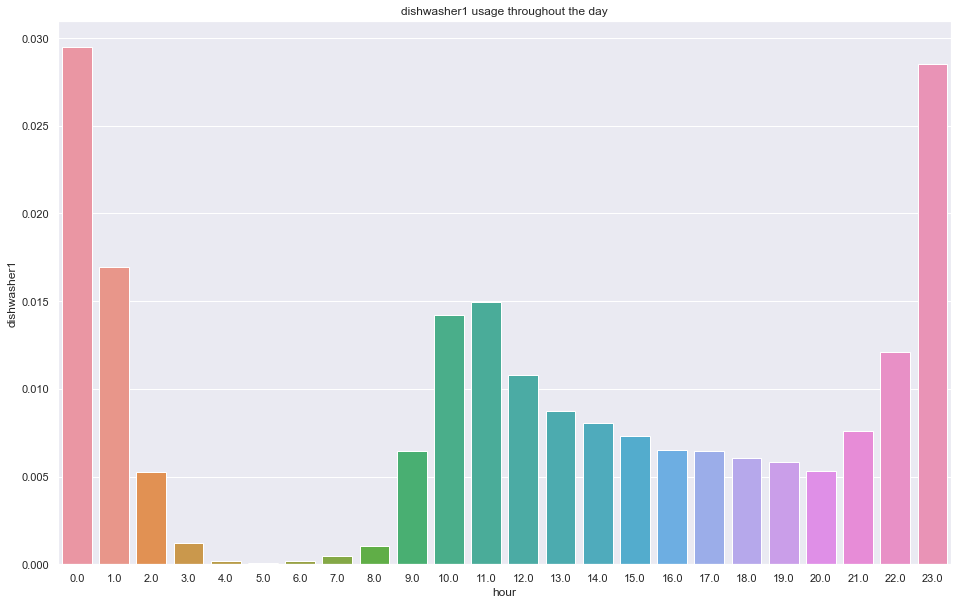

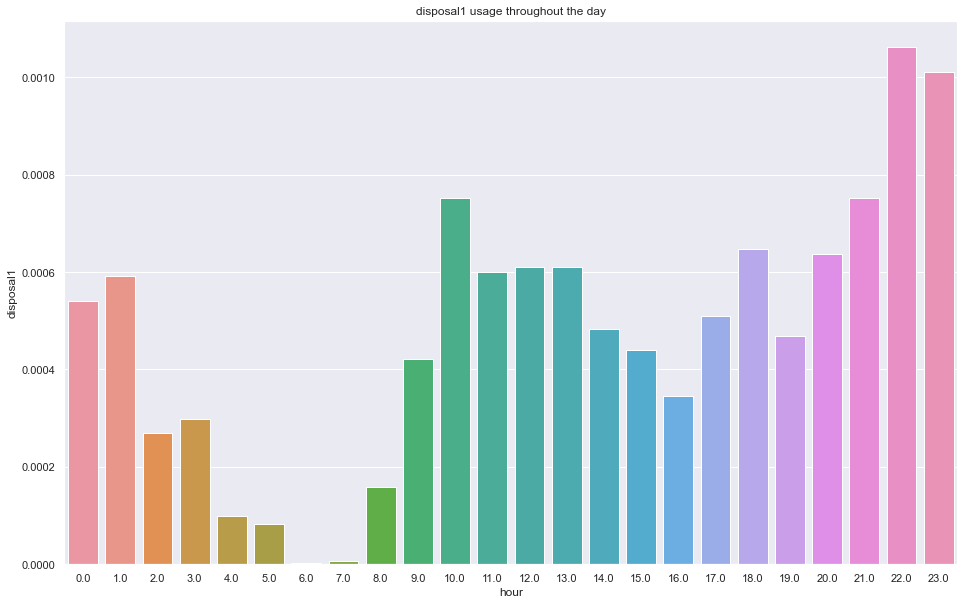

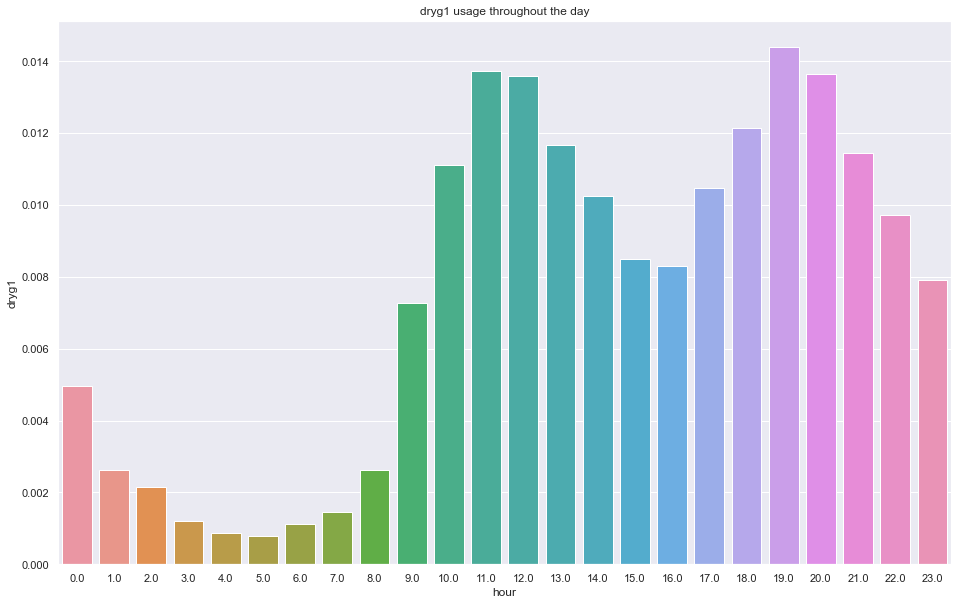

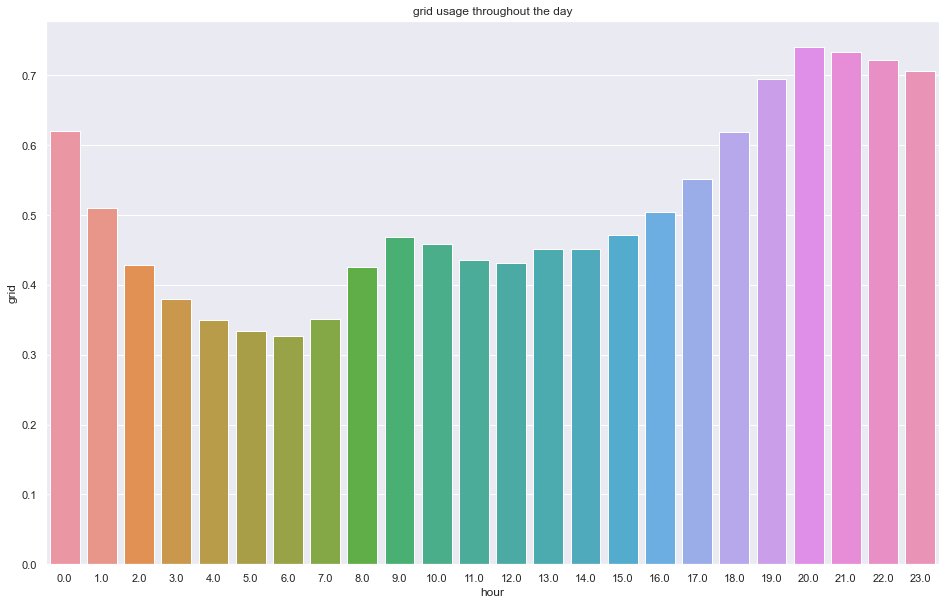

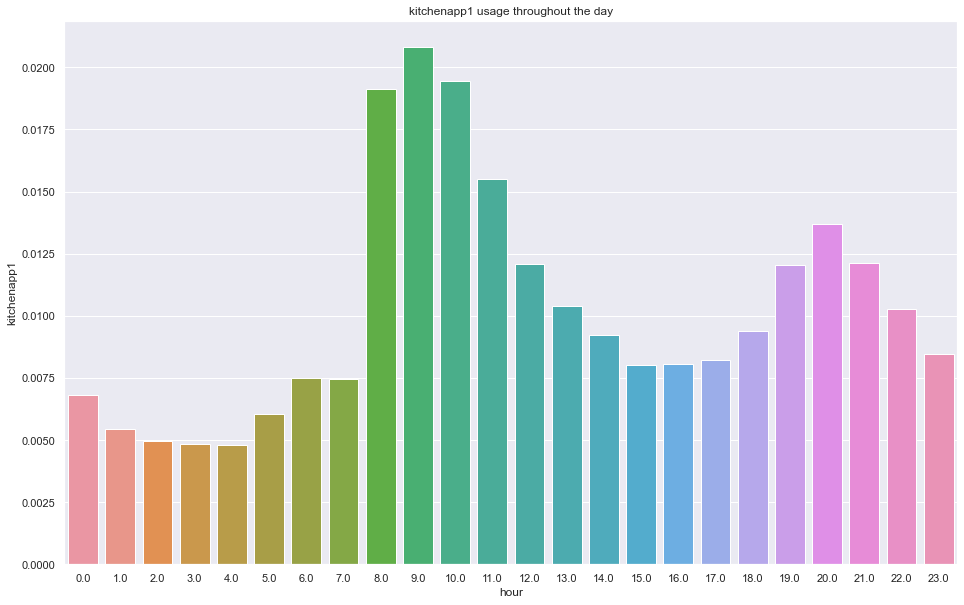

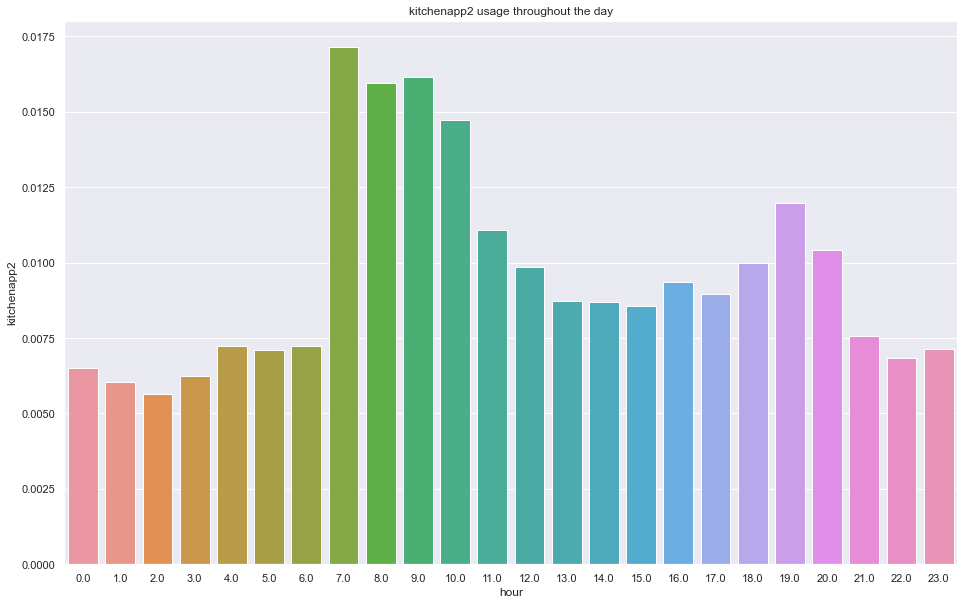

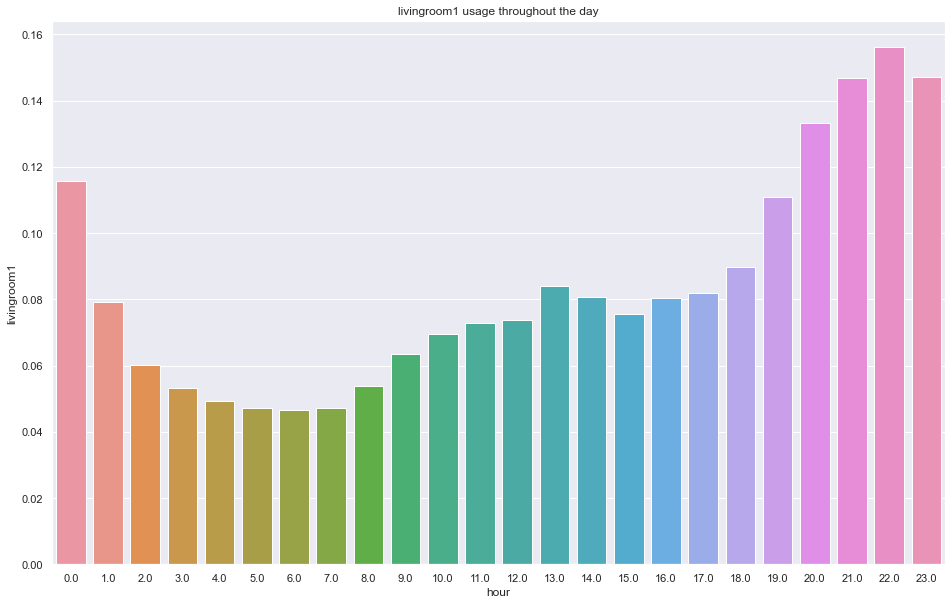

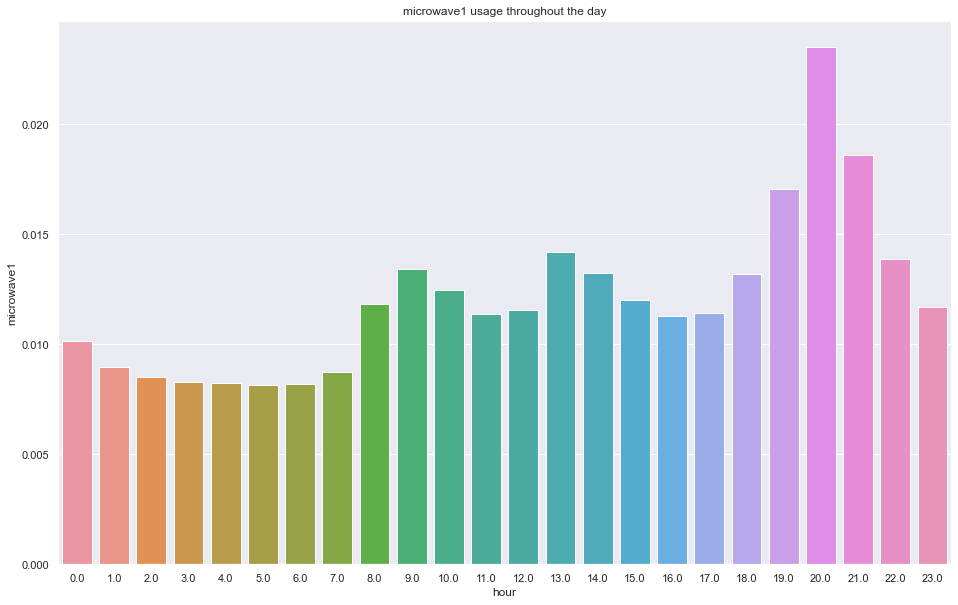

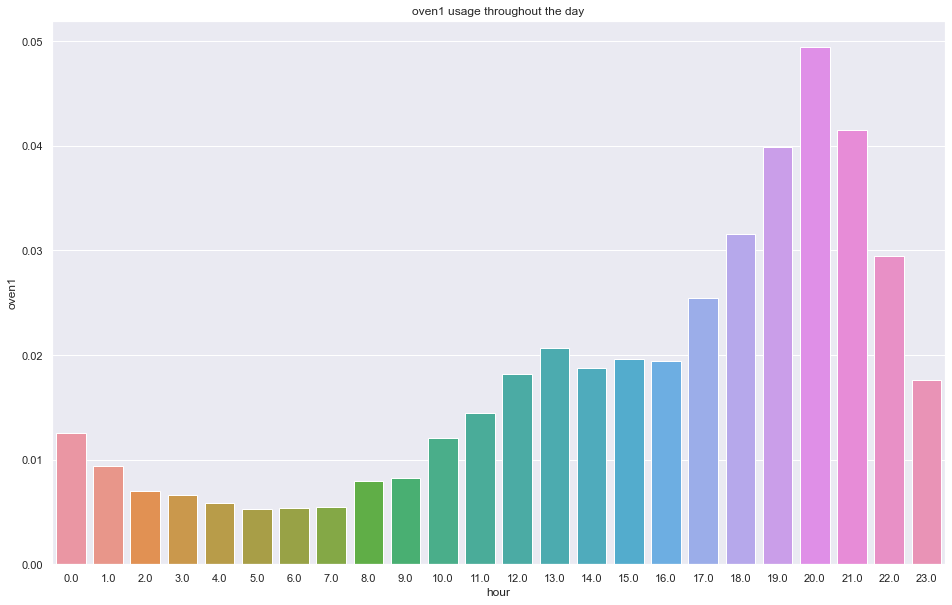

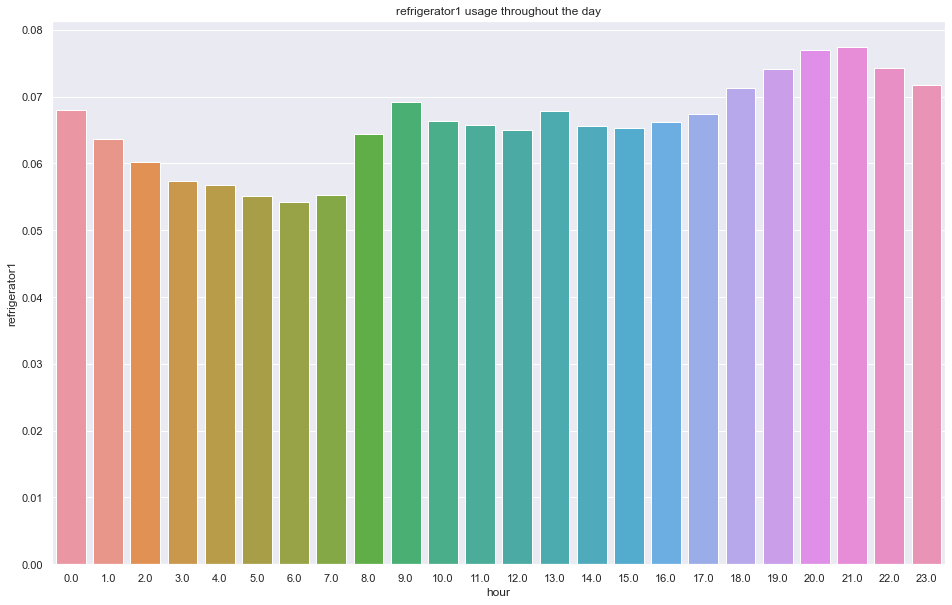

In [194]:
for col in ["air1", "clotheswasher1", "clotheswasher_dryg1", "dishwasher1", "disposal1", "dryg1", "grid", "kitchenapp1", "kitchenapp2", "livingroom1", "microwave1", "oven1", "refrigerator1"]:
    df = ca_data.groupby("hour")[["hour", col]].mean()
    sns.barplot(data=df, x="hour", y=col)
    title = col + " usage throughout the day"
    plt.title(title)
    plt.show()

## 2018 Analysis
* We have data for 3 houses in 2018
* 1731 - townhome in San Diego
* 4495 - apartment in San Diego
* 8342 - townhome in San Diego

In [309]:
ca_data_2018 = ca_data[ca_data["year"] == 2018]
ca_data_2018["dataid"].unique()

array([1731, 4495, 8342])